In [2]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the necessary csv file 
df=pd.read_csv('weatherHistory.csv',usecols=['Formatted Date', 'Apparent Temperature (C)', 'Humidity'])

In [5]:
df

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83
...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,26.016667,0.43
96449,2016-09-09 20:00:00.000 +0200,24.583333,0.48
96450,2016-09-09 21:00:00.000 +0200,22.038889,0.56
96451,2016-09-09 22:00:00.000 +0200,21.522222,0.60


In [7]:
# rename columns
df.rename(columns={'Formatted Date': 'Date',
                   'Apparent Temperature (C)': 'Apparent Temp'}, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           96453 non-null  object 
 1   Apparent Temp  96453 non-null  float64
 2   Humidity       96453 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB


In [10]:
df.isna().sum()

Date             0
Apparent Temp    0
Humidity         0
dtype: int64

In [16]:
#we need to convert object to date
df['Date']=pd.to_datetime(df['Date'],utc=True)
df

,Date,Apparent Temp,Humidity
0,2006-03-31 22:00:00+00:00,7.388889,0.89
1,2006-03-31 23:00:00+00:00,7.227778,0.86
2,2006-04-01 00:00:00+00:00,9.377778,0.89
3,2006-04-01 01:00:00+00:00,5.944444,0.83
4,2006-04-01 02:00:00+00:00,6.977778,0.83
...,...,...,...
96448,2016-09-09 17:00:00+00:00,26.016667,0.43
96449,2016-09-09 18:00:00+00:00,24.583333,0.48
96450,2016-09-09 19:00:00+00:00,22.038889,0.56
96451,2016-09-09 20:00:00+00:00,21.522222,0.60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           96453 non-null  datetime64[ns, UTC]
 1   Apparent Temp  96453 non-null  float64            
 2   Humidity       96453 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 2.2 MB


In [18]:

# make 'Date' column as an index
df.set_index(df['Date'], inplace=True)
df

,Date,Apparent Temp,Humidity
Date,,,
2006-03-31 22:00:00+00:00,2006-03-31 22:00:00+00:00,7.388889,0.89
2006-03-31 23:00:00+00:00,2006-03-31 23:00:00+00:00,7.227778,0.86
2006-04-01 00:00:00+00:00,2006-04-01 00:00:00+00:00,9.377778,0.89
2006-04-01 01:00:00+00:00,2006-04-01 01:00:00+00:00,5.944444,0.83
2006-04-01 02:00:00+00:00,2006-04-01 02:00:00+00:00,6.977778,0.83
...,...,...,...
2016-09-09 17:00:00+00:00,2016-09-09 17:00:00+00:00,26.016667,0.43
2016-09-09 18:00:00+00:00,2016-09-09 18:00:00+00:00,24.583333,0.48
2016-09-09 19:00:00+00:00,2016-09-09 19:00:00+00:00,22.038889,0.56


In [20]:
resample=data = df[['Apparent Temp', 'Humidity']].resample('MS').mean()
resample


,Apparent Temp,Humidity
Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='Graph for all months'>

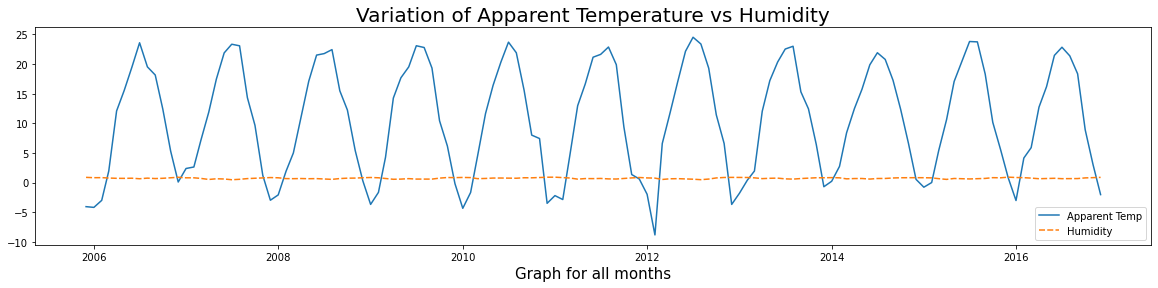

In [21]:
plt.figure(figsize=(20,4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('Graph for all months', fontsize=15)
sns.lineplot(data=resample)

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='January'>

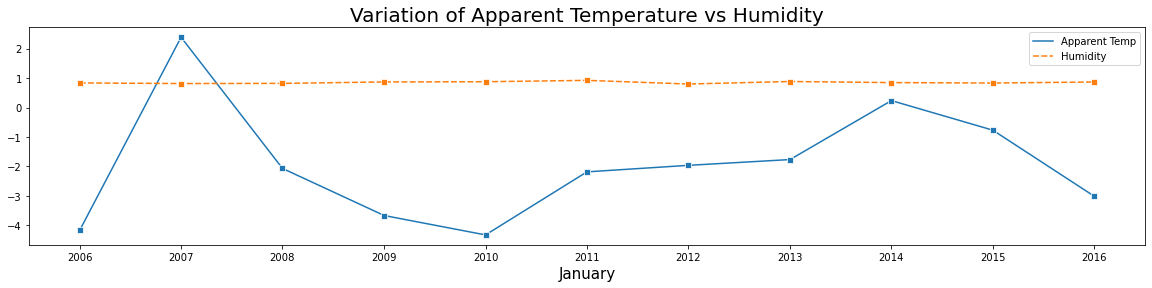

In [23]:

january_data = data[data.index.month==1]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('January', fontsize=15)
sns.lineplot(data=january_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='Febuary'>

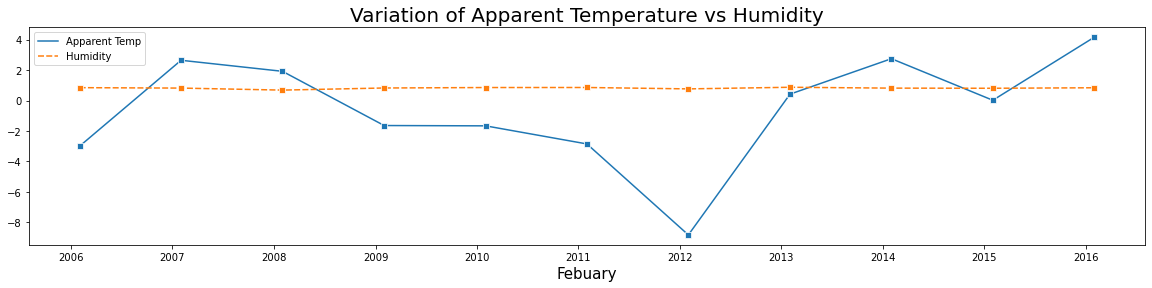

In [24]:

febuary_data = data[data.index.month==2]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('Febuary', fontsize=15)
sns.lineplot(data=febuary_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='March'>

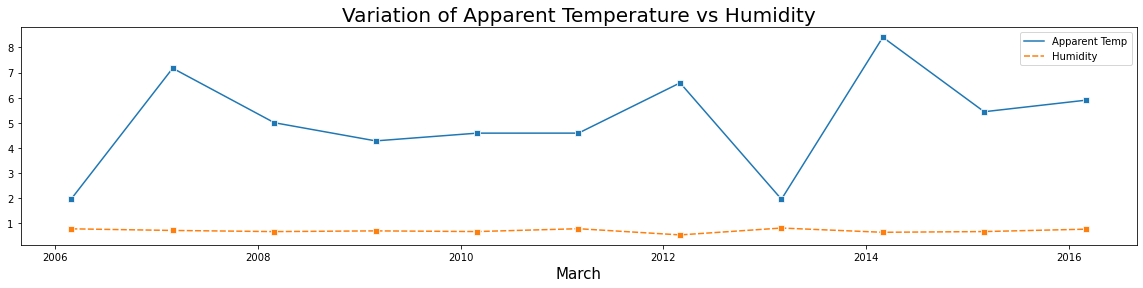

In [25]:

march_data = data[data.index.month==3]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('March', fontsize=15)
sns.lineplot(data=march_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='April'>

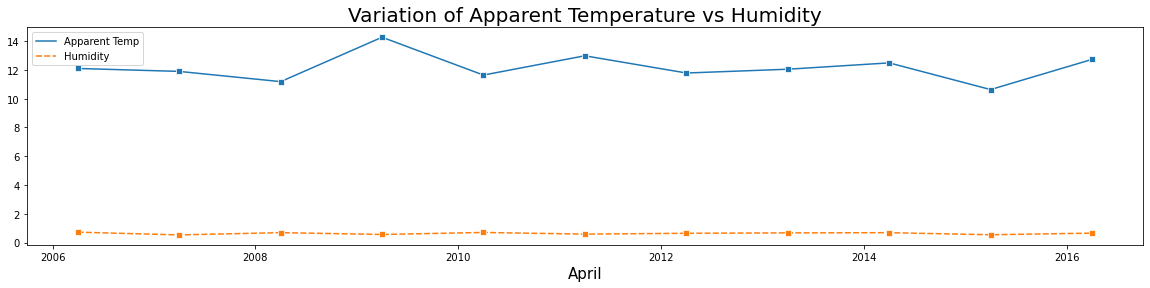

In [26]:

april_data = data[data.index.month==4]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('April', fontsize=15)
sns.lineplot(data=april_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='May'>

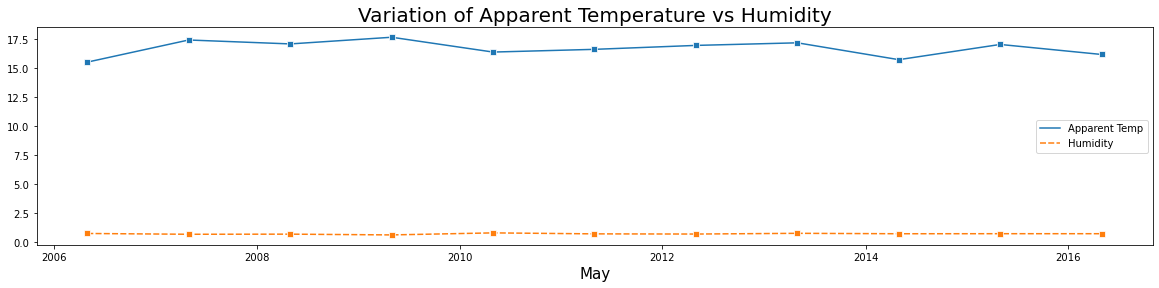

In [27]:

may_data = data[data.index.month==5]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('May', fontsize=15)
sns.lineplot(data=may_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='June'>

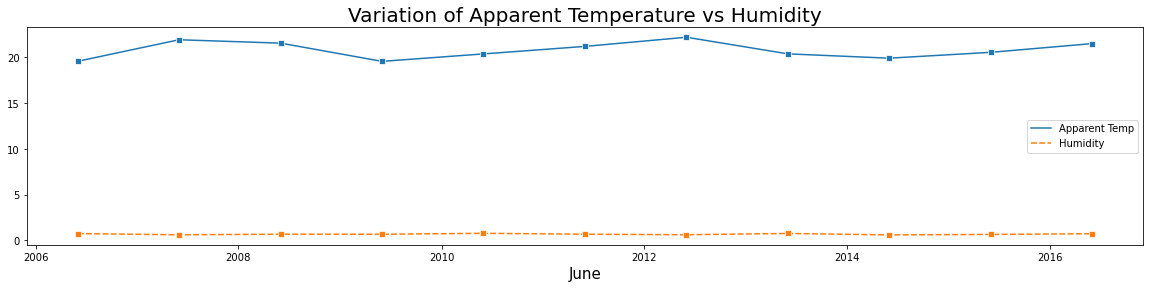

In [28]:

june_data = data[data.index.month==6]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('June', fontsize=15)
sns.lineplot(data=june_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='July'>

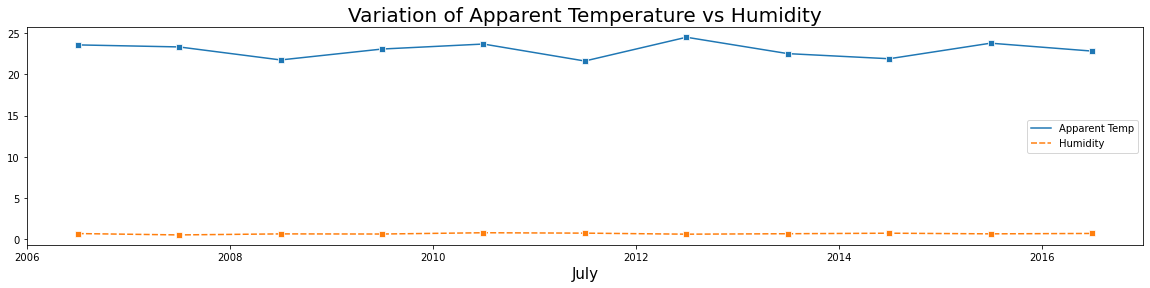

In [29]:

july_data = data[data.index.month==7]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('July', fontsize=15)
sns.lineplot(data=july_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='August'>

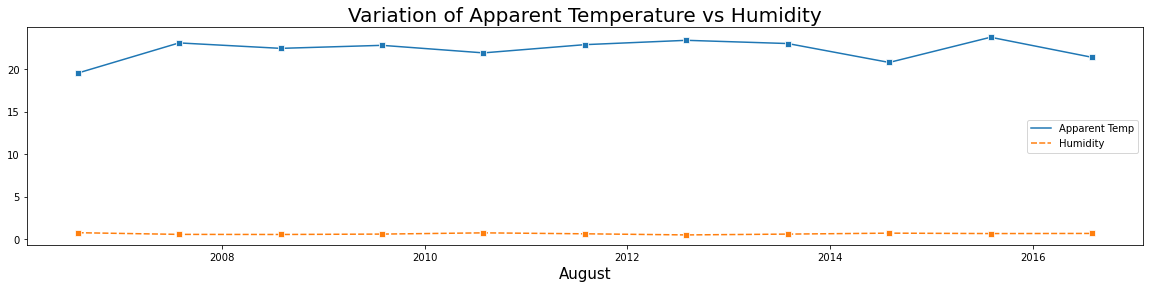

In [30]:

august_data = data[data.index.month==8]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('August', fontsize=15)
sns.lineplot(data=august_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='September'>

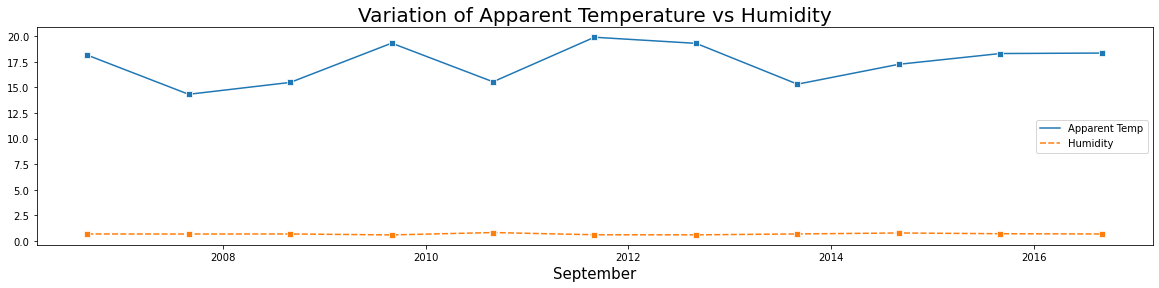

In [31]:

september_data = data[data.index.month==9]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('September', fontsize=15)
sns.lineplot(data=september_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='October'>

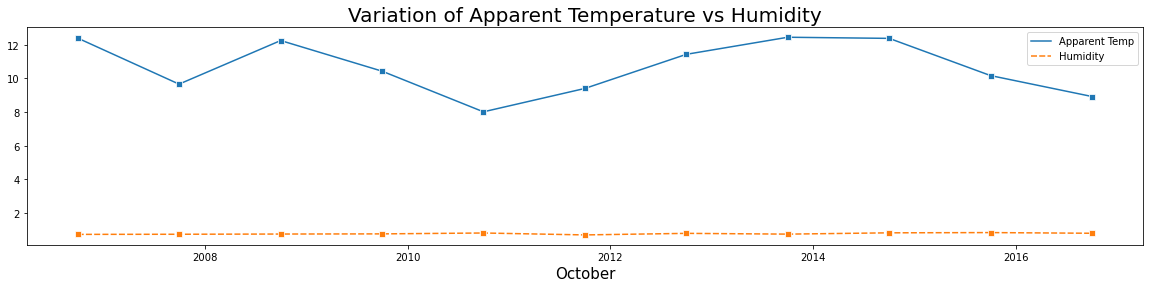

In [32]:

october_data = data[data.index.month==10]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('October', fontsize=15)
sns.lineplot(data=october_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='November'>

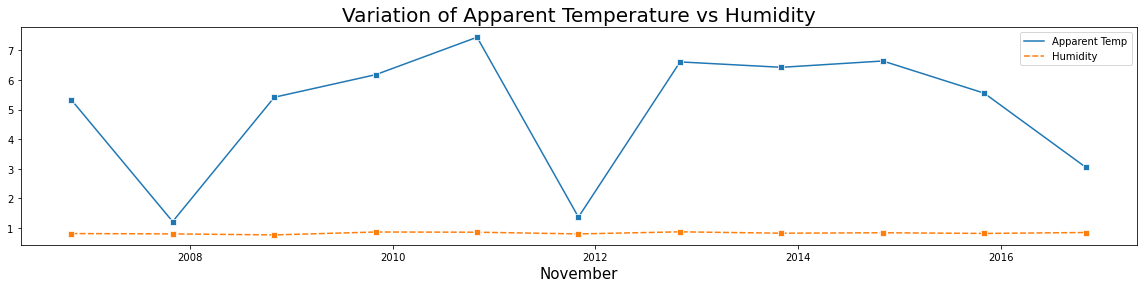

In [33]:

november_data = data[data.index.month==11]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('November', fontsize=15)
sns.lineplot(data=november_data, marker='s')

<AxesSubplot:title={'center':'Variation of Apparent Temperature vs Humidity'}, xlabel='December'>

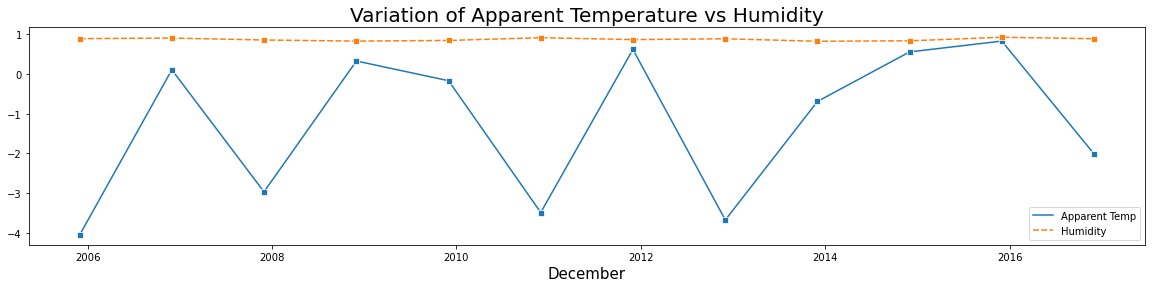

In [34]:

december_data = data[data.index.month==12]
plt.figure(figsize=(20, 4))
plt.title('Variation of Apparent Temperature vs Humidity', fontsize=20)
plt.xlabel('December', fontsize=15)
sns.lineplot(data=december_data, marker='s')